# **Ex2: Implement PCA algorithm to reduce dimension (2D) of iris dataset (https://archive.ics.uci.edu/ml/datasets/iris), then visualize  the result.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg as LA
import pandas as pd
from sklearn import datasets


In [ ]:
def PCA(data, dims_rescaled_data=2):
    m, n = data.shape
    # mean center the data
    data -= data.mean(axis=0)
    # calculate the covariance matrix
    R = np.cov(data, rowvar=False)
    # calculate eigenvectors & eigenvalues of the covariance matrix
    # use 'eigh' rather than 'eig' since R is symmetric, 
    # the performance gain is substantial
    evals, evecs = LA.eigh(R)
    # sort eigenvalue in decreasing order
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    # sort eigenvectors according to same index
    evals = evals[idx]
    # select the first n eigenvectors (n is desired dimension
    # of rescaled data array, or dims_rescaled_data)
    evecs = evecs[:, :dims_rescaled_data]
    # carry out the transformation on the data using eigenvectors
    # and return the re-scaled data, eigenvalues, and eigenvectors
    return np.dot(evecs.T, data.T).T#, evals, evecs  
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Target'] = iris.get('target')
#iris=datasets.load_iris()
#data = np.loadtxt(df, delimiter=',')
# remove class labels
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = data[features].values
PCA(X)

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045],
       [-2.82053775,  0.08946138],
       [-2.62614497, -0.16338496],
       [-2.88638273,  0.57831175],
       [-2.6727558 ,  0.11377425],
       [-2.50694709, -0.6450689 ],
       [-2.61275523, -0.01472994],
       [-2.78610927,  0.235112  ],
       [-3.22380374,  0.51139459],
       [-2.64475039, -1.17876464],
       [-2.38603903, -1.33806233],
       [-2.62352788, -0.81067951],
       [-2.64829671, -0.31184914],
       [-2.19982032, -0.87283904],
       [-2.5879864 , -0.51356031],
       [-2.31025622, -0.39134594],
       [-2.54370523, -0.43299606],
       [-3.21593942, -0.13346807],
       [-2.30273318, -0.09870885],
       [-2.35575405,  0.03728186],
       [-2.50666891,  0.14601688],
       [-2.46882007, -0.13095149],
       [-2.56231991, -0.36771886],
       [-2.63953472,

In [ ]:
new=pd.DataFrame(PCA(X),columns=['PC1', 'PC2'])
target = pd.Series(data['Target'], name='target')
result_df = pd.concat([new, target], axis=1)
result_df.head(5)

,PC1,PC2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


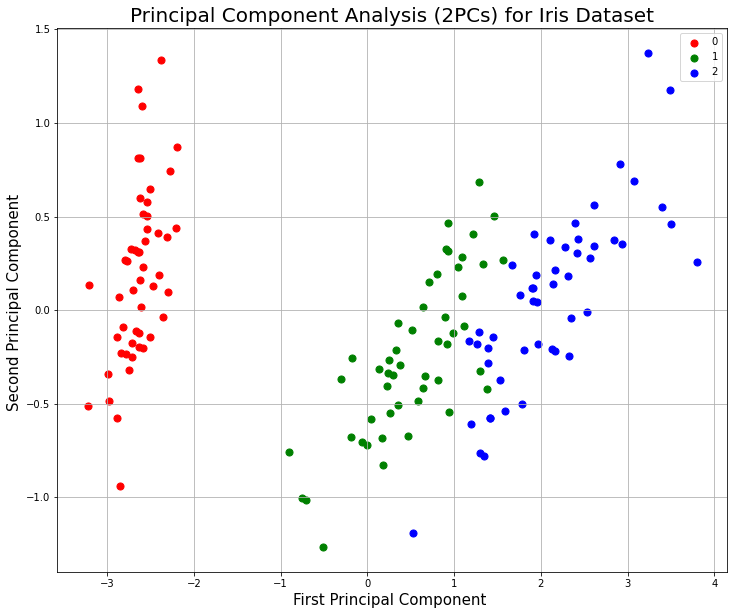

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)
ax.set_title('Principal Component Analysis (2PCs) for Iris Dataset', fontsize = 20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = iris['target'] == target
    ax.scatter(result_df.loc[indicesToKeep, 'PC1'], 
               result_df.loc[indicesToKeep, 'PC2'], 
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()

# **Ex3: Use PCA in sklearn to iris dataset and compare the result with the question 2**

In [ ]:
iris_2 = datasets.load_iris()
df = pd.DataFrame(iris_2.data, columns=iris_2.feature_names)
df['Target'] = iris_2.get('target')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Create features and target datasets
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df[features].values
y = df['Target'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
X = StandardScaler().fit_transform(X)
# Preview X
pd.DataFrame(data=X, columns=features).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
# Import PCA from sklearn
from sklearn.decomposition import PCA
# Instantiate PCA
pca = PCA(n_components=2)
# Fit PCA to features
principalComponents = pca.fit_transform(X)

In [ ]:
# Create a new dataset from principal components 
df = pd.DataFrame(data = principalComponents, 
                  columns = ['PC1', 'PC2'])

target = pd.Series(iris['target'], name='target')

result_df = pd.concat([df, target], axis=1)
result_df.head(5)

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


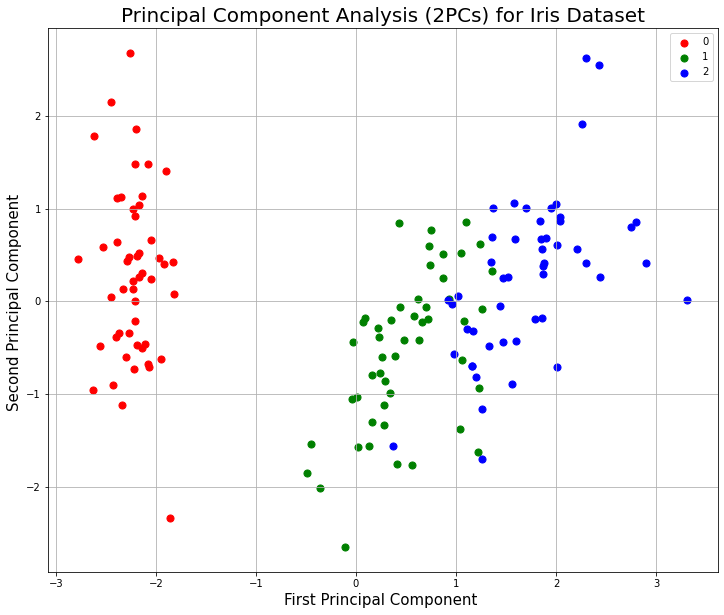

In [ ]:
# Visualize Principal Components with a scatter plot
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)
ax.set_title('Principal Component Analysis (2PCs) for Iris Dataset', fontsize = 20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = iris['target'] == target
    ax.scatter(result_df.loc[indicesToKeep, 'PC1'], 
               result_df.loc[indicesToKeep, 'PC2'], 
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()